# **Introducción al análisis de datos en Python** 
#### Profesora: Catalina Bernal

## Clase 5. Visualización

In [ ]:
!pip3 install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Gráficos rápidos
Desde `pandas`, cuando tengamos un `dataframe` podemos construir gráficos rápidamente sin la necesidad de escribir mucho código. Esto se debe a que `pandas` se integra con la librería para visualización en Python `matplotlib`.

El método más importante para hacer gráficos desde `pandas` es `. plot()`. Por ejemplo, si tienes un DataFrame con dos columnas, 'x' e 'y', puedes crear un gráfico de dispersión con el siguiente código:


In [2]:
data = {'var_ind': [1, 2, 3, 4, 5], 'var_dep': [2, 4, 6, 8, 10]}
df = pd.DataFrame(data)
df

,var_ind,var_dep
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


Gráfico de dispersión

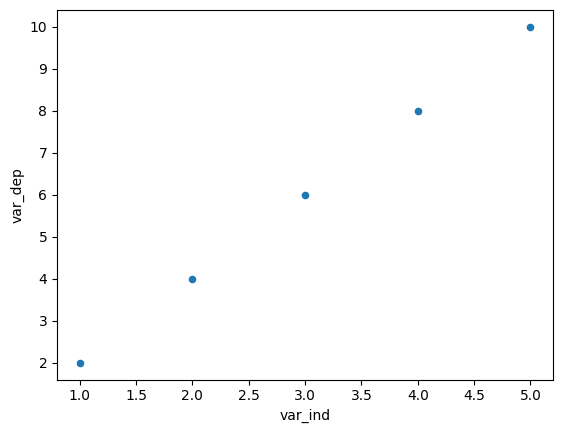

In [5]:
df.plot(x = 'var_ind', y = 'var_dep', kind = 'scatter');
#Scatter -> Dispersión

Este código creará un gráfico de dispersión con los valores de 'x' en el eje horizontal y los valores de 'y' en el eje vertical.

Puedes personalizar tu gráfico utilizando los métodos de `Matplotlib`. Por ejemplo, para cambiar el color de los puntos, puedes utilizar el parámetro `color`:

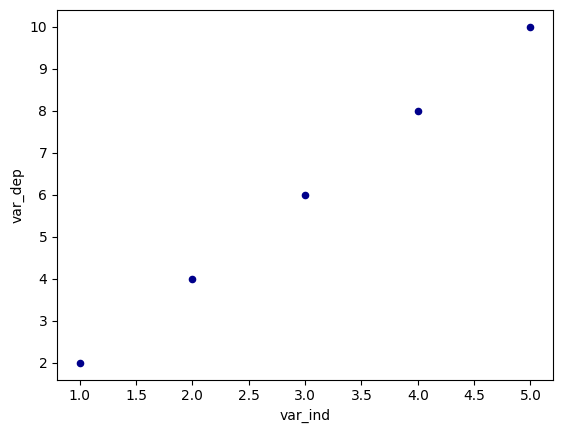

In [6]:
df.plot(x = 'var_ind', y = 'var_dep', kind = 'scatter', color = 'darkblue');

La función `plot()` de Pandas es utilizada para visualizar datos de un DataFrame o Series. La sintaxis básica es la siguiente:

```python
DataFrame.plot(x = None, y = None, kind = 'line', ax = None, subplots = False, layout = None, figsize = None, use_index = True, title = None, grid = None, legend = True, style = None, logx = False, logy = False, loglog = False, xticks = None, yticks = None, xlim = None, ylim = None, rot = None, xerr = None, yerr = None, label = None, secondary_y = False, **kwds)
```
A continuación, te explico los principales parámetros de esta función:

- `x` y `y`: son las etiquetas o nombres de las columnas que se utilizarán para el eje x y el eje y, respectivamente.
- `kind`: es el tipo de gráfico que se quiere generar, como 'line' para un gráfico de líneas, 'bar' para un gráfico de barras, 'scatter' para un gráfico de dispersión, etc. Por defecto, el valor es 'line'.
- `figsize`: es un parámetro opcional que permite especificar el tamaño del gráfico en pulgadas. El valor por defecto es (6,4).
- `title`: es un parámetro opcional que permite agregar un título al gráfico.
- `xlabel` y `ylabel`: son parámetros opcionales que permiten agregar etiquetas a los ejes x e y del gráfico.
- `xlim` y `ylim`: son parámetros opcionales que permiten establecer los límites del eje x e y, respectivamente.
- `legend`: es un parámetro opcional que permite controlar si se muestra o no la leyenda en el gráfico. El valor por defecto es True.
- `style`: es un parámetro opcional que permite especificar el estilo de la línea o puntos en el gráfico.
- `logx`, `logy` y `loglog`: son parámetros opcionales que permiten mostrar los ejes en una escala logarítmica en lugar de lineal.
- `subplots`: es un parámetro opcional que permite generar un gráfico para cada columna de un DataFrame y presentarlos en un arreglo de subplots.

Hay muchos otros parámetros opcionales que se pueden utilizar con la función `plot()`. Te recomiendo revisar la [documentación oficial de Pandas para obtener más detalles sobre la función y sus parámetros](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

In [7]:
base_de_datos = pd.read_csv(f'./data/info_accidentes.csv')
base_de_datos['Fecha'] = pd.to_datetime(base_de_datos['Fecha'])

/var/folders/t9/n67k3lts6wl76ntfbg_ntw3w0000gn/T/ipykernel_22467/2622692782.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  base_de_datos['Fecha'] = pd.to_datetime(base_de_datos['Fecha'])


Esta base de datos nos muestra la información de accidentes vehiculares ocurridos en Bogotá durante el año 2016. Incluye información sobre la localidad, fecha y hora del accidente así como información del tiempo atmosférico y del número de víctimas que este ocasionó.

In [8]:
base_de_datos.head()

,Fecha,GravedadNombre,ClaseNombre,ChoqueNombre,ObjetoFijoCodigo,ObjetoFijoNombre,OtraClase,NombreOtraClase,Latitud,Longitud,...,TipoVia2,NumeroVia2,LetraVia2,CardinalVia2,Localidad,HoraOcurrencia,TipoDiseño,TipoTiempo,TotalMuertos,TotalHeridos
0,2016-01-13,Con Heridos,Choque,Vehiculo,,,,,0.0,0.0,...,CL,83.0,,,ENGATIVA,12/31/1899 10:30:00 PM,Interseccion,Normal,0,2
1,2016-01-12,Con Heridos,Atropello,,,,,,0.0,0.0,...,KR,7.0,,,USAQUEN,12/31/1899 03:40:00 PM,Interseccion,Normal,0,1
2,2016-01-13,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,KR,5.0,,E,SAN CRISTOBAL,12/31/1899 07:20:00 AM,Tramo de Via,Normal,0,0
3,2016-01-17,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,KR,107.0,,,ENGATIVA,12/31/1899 06:10:00 AM,Tramo de Via,Normal,0,0
4,2016-01-18,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,CL,48.0,,S,RAFAEL URIBE URIBE,12/31/1899 05:00:00 PM,Tramo de Via,Normal,0,0


In [11]:
base_de_datos.groupby("Fecha").size().reset_index(name = "Número de accidentes")

,Fecha,Número de accidentes
0,2016-01-01,28
1,2016-01-02,29
2,2016-01-03,40
3,2016-01-04,56
4,2016-01-05,70
...,...,...
361,2016-12-27,112
362,2016-12-28,92
363,2016-12-29,91
364,2016-12-30,82


<Axes: xlabel='Fecha'>

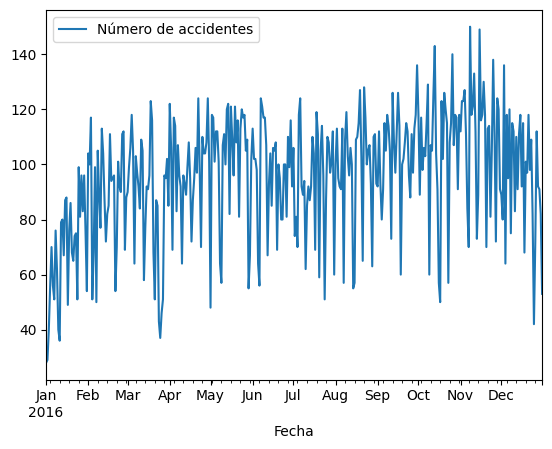

In [13]:
base_de_datos.groupby("Fecha").size().reset_index(name = "Número de accidentes").plot(x = "Fecha", y = "Número de accidentes")

<Axes: xlabel='Fecha'>

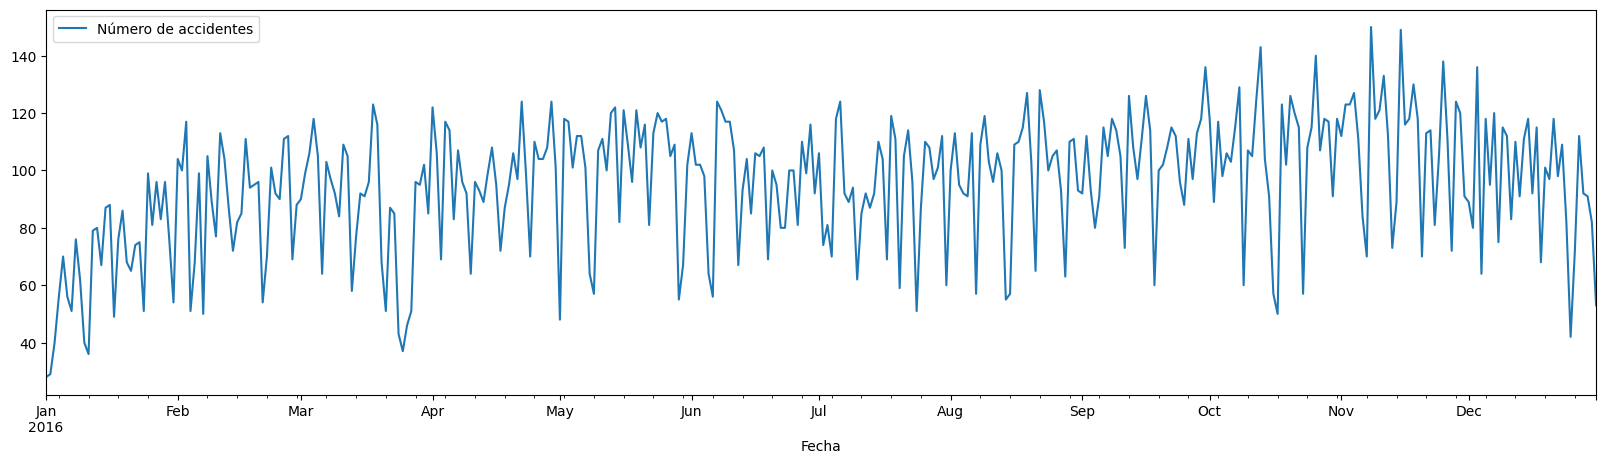

In [14]:
# Cambiemos el tamaño al gráfico
base_de_datos.groupby("Fecha").size().reset_index(name = "Número de accidentes").plot(x = "Fecha", y = "Número de accidentes", kind = "line", figsize = (20, 5))

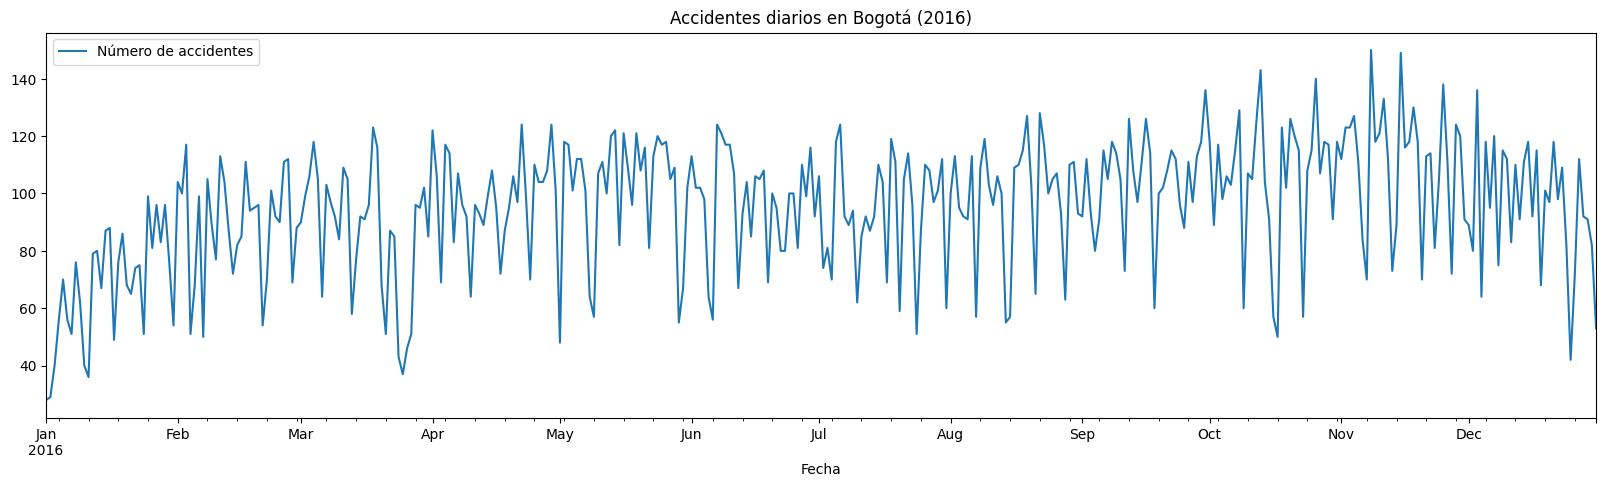

In [16]:
# Pongamos un título
(base_de_datos.groupby("Fecha").size().reset_index(name = "Número de accidentes")
        .plot(x = "Fecha", y = "Número de accidentes", kind = "line", figsize = (20, 5), 
        title = "Accidentes diarios en Bogotá (2016)"));

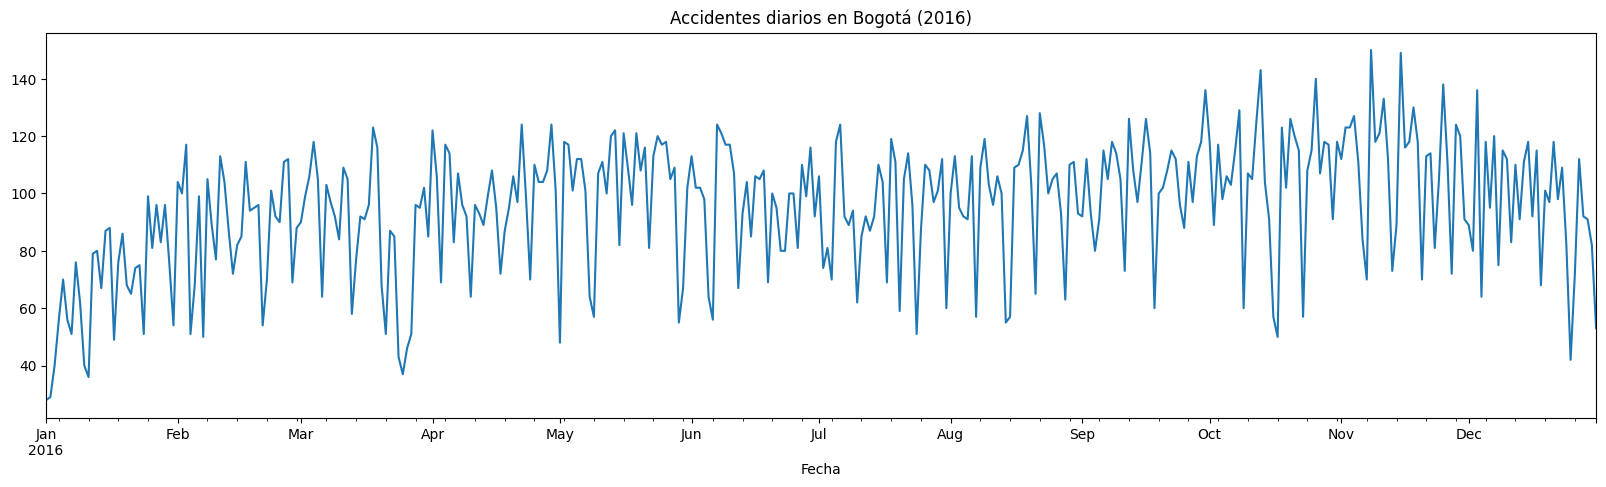

In [17]:
# Quitemos la legenda
(base_de_datos.groupby("Fecha").size().reset_index(name = "Número de accidentes")
        .plot(x = "Fecha", y = "Número de accidentes", kind = "line", figsize = (20, 5), 
        title = "Accidentes diarios en Bogotá (2016)", legend = False));

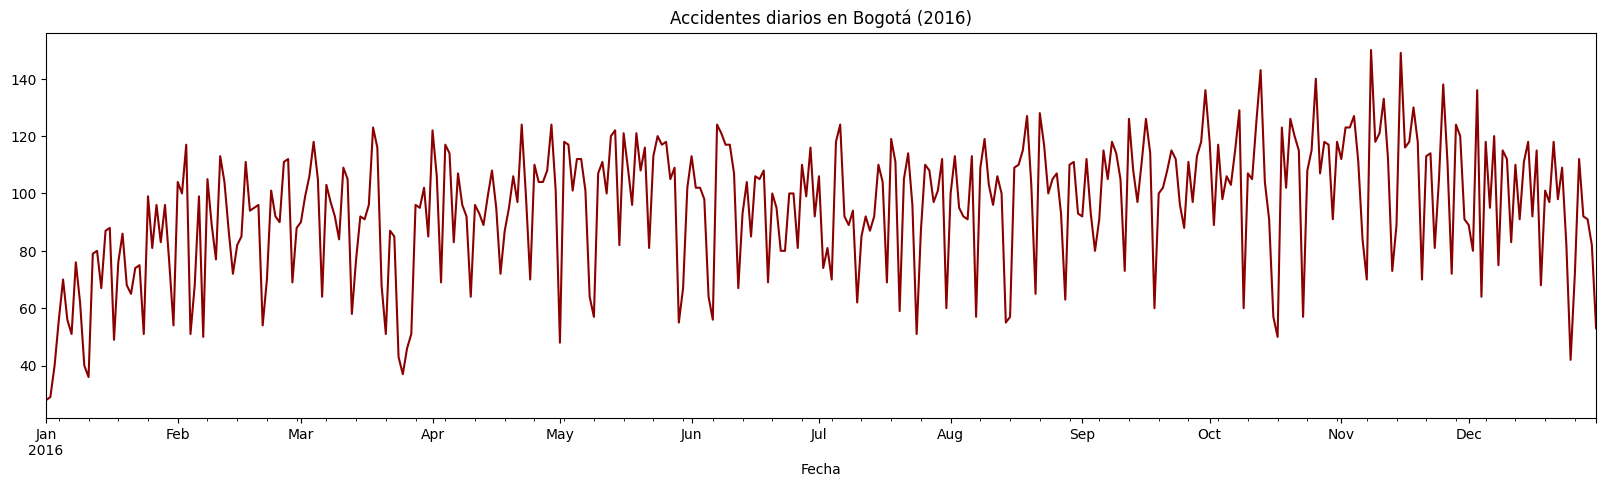

In [18]:
# Pongamos otro color a la línea
(base_de_datos.groupby("Fecha").size().reset_index(name = "Número de accidentes")
        .plot(x = "Fecha", y = "Número de accidentes", kind = "line", figsize = (20, 5), 
        title = "Accidentes diarios en Bogotá (2016)", legend = False,
        color = "darkred"));

¿Cómo hago para saber qué colores existen? Por defecto, `pandas` y `matplotlib` tienen algunas palabras asociadas a algunos [colores](https://matplotlib.org/stable/gallery/color/named_colors.html)

<center>
<div>
<img src="https://raw.githubusercontent.com/edco-proyectos-analitica-python/IntroAnalisisDatos2025Q1/refs/heads/main/clase_5/img/colors.png" width="400"/>
</div>
</center>

<Axes: title={'center': 'Accidentes diarios en Bogotá (2016)'}, xlabel='Fecha'>

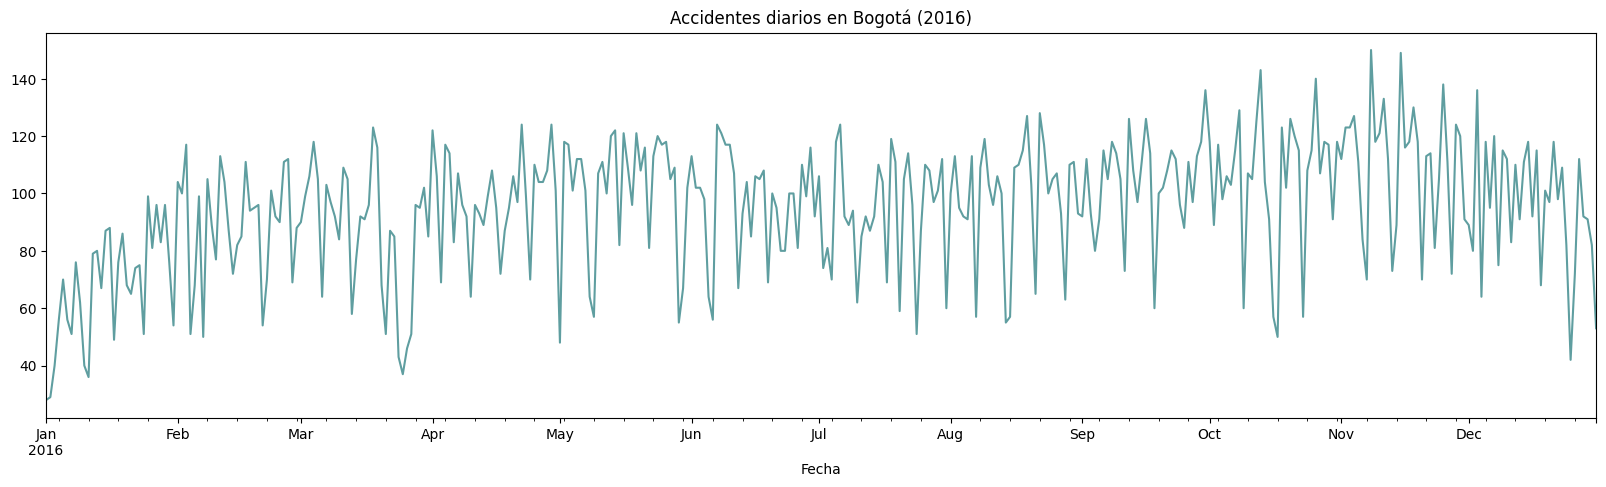

In [19]:
# Pongamos otro color a la línea
base_de_datos.groupby("Fecha").size().reset_index(name = "Número de accidentes") \
    .plot(x = "Fecha", y = "Número de accidentes", kind = "line", figsize = (20, 5), 
          title = "Accidentes diarios en Bogotá (2016)", legend = False,
          color = "cadetblue")

<Axes: title={'center': 'Accidentes diarios en Bogotá (2016)'}, xlabel='Fecha'>

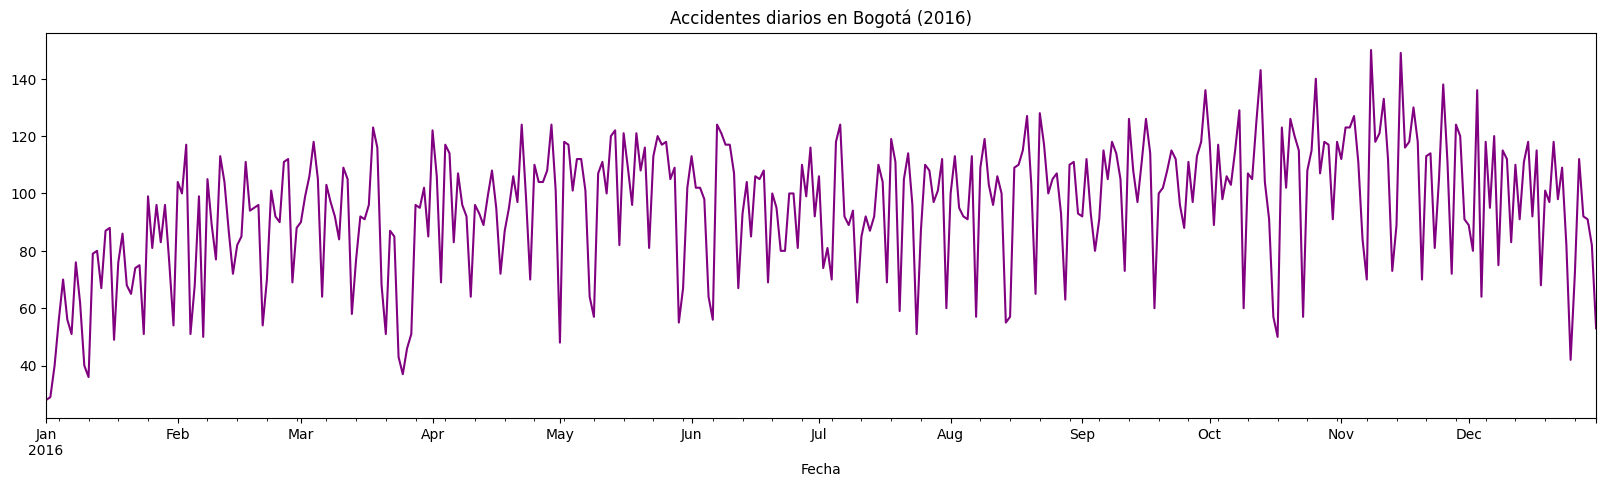

In [20]:
# Pongamos otro color a la línea
base_de_datos.groupby("Fecha").size().reset_index(name = "Número de accidentes") \
    .plot(x = "Fecha", y = "Número de accidentes", kind = "line", figsize = (20, 5), 
          title = "Accidentes diarios en Bogotá (2016)", legend = False,
          color = "purple")

<Axes: title={'center': 'Accidentes diarios en Bogotá (2016)'}, xlabel='Fecha'>

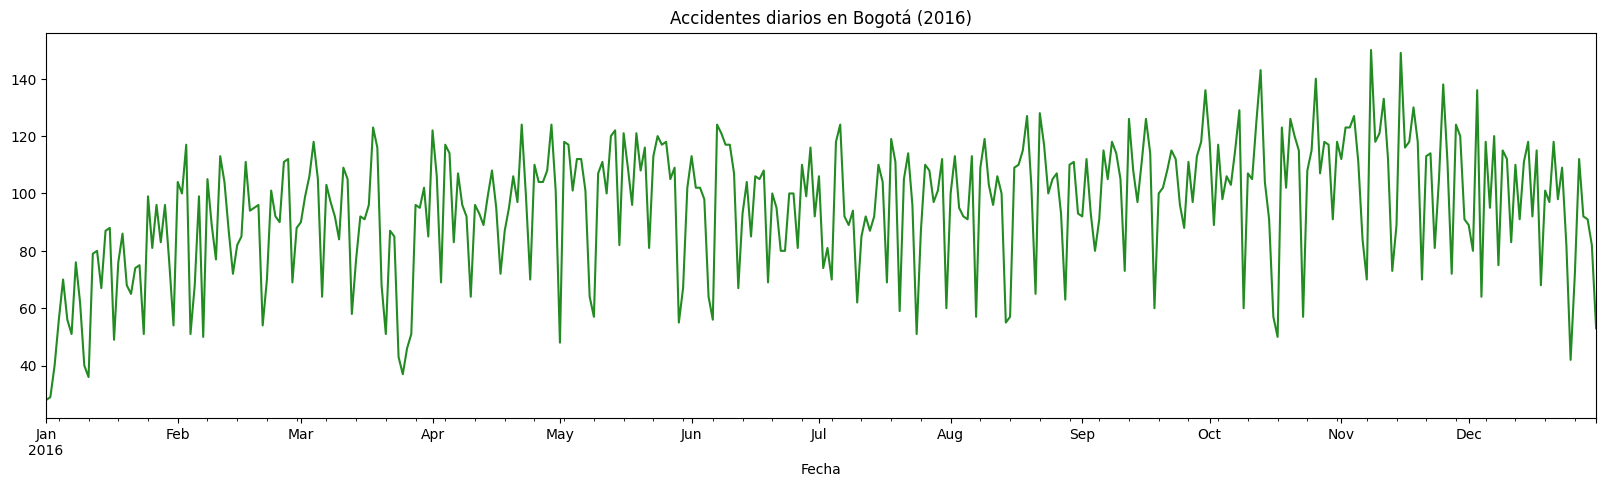

In [21]:
# Pongamos otro color a la línea
base_de_datos.groupby("Fecha").size().reset_index(name = "Número de accidentes") \
    .plot(x = "Fecha", y = "Número de accidentes", kind = "line", figsize = (20, 5), 
          title = "Accidentes diarios en Bogotá (2016)", legend = False,
          color = "forestgreen")

Sin embargo, puede crear cualquier color que quiera a partir del [código HEX](https://www.google.com/search?q=HEX+color&rlz=1C1CHZN_enCO1034CO1034&sxsrf=APwXEdfScUmp_Pr0bIhq9xV33av52uCWKA%3A1680729192725&ei=aOQtZOv1K--FwbkP1PCygAM&ved=0ahUKEwjryfuT1JP-AhXvQjABHVS4DDAQ4dUDCA8&uact=5&oq=HEX+color&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIHCAAQigUQQzIHCAAQigUQQzIHCAAQigUQQzIHCAAQigUQQzIGCAAQBxAeMgcIABCKBRBDMggIABCABBDLATIICAAQgAQQywEyBggAEAcQHjIGCAAQBxAeOgoIABBHENYEELADOgoIABCKBRCwAxBDSgQIQRgAUNYPWL0RYPYUaAJwAXgAgAHFAYgBlQSSAQMwLjOYAQCgAQHIAQrAAQE&sclient=gws-wiz-serp)


<center>
<div>
<img src="https://raw.githubusercontent.com/edco-proyectos-analitica-python/IntroAnalisisDatos2025Q1/refs/heads/main/clase_5/img/HEX.png" width="400"/>
</div>
</center>

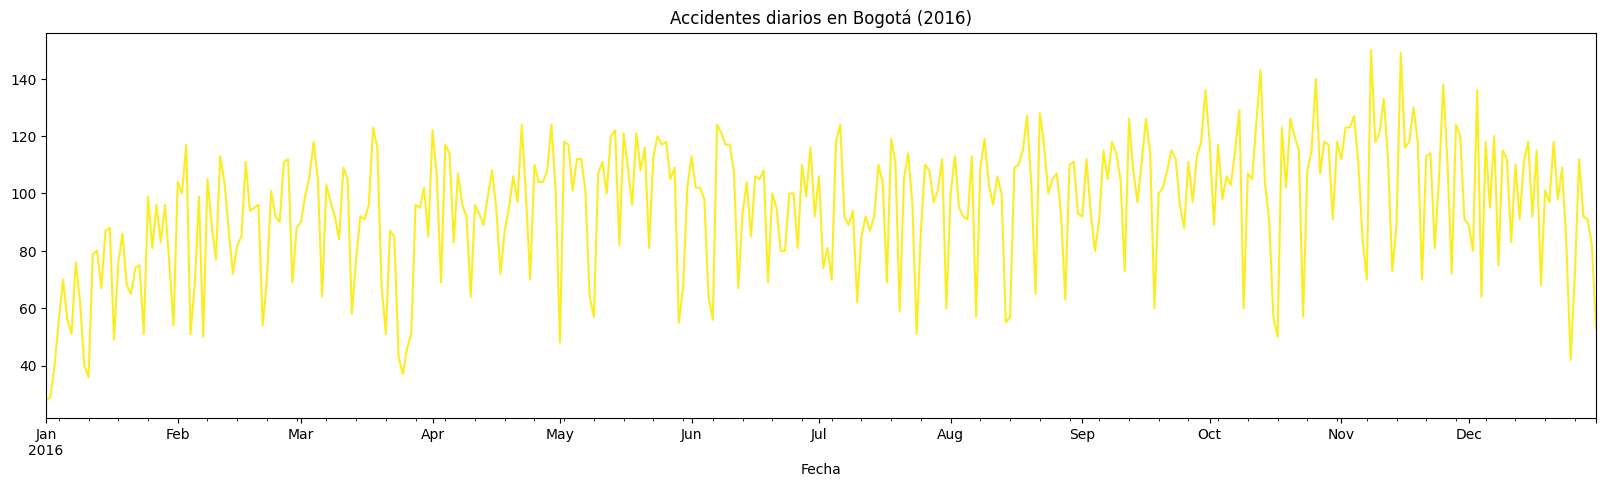

In [ ]:
# Pongamosle color a la línea
(base_de_datos.groupby("Fecha").size().reset_index(name = "Número de accidentes") 
    .plot(x = "Fecha", y = "Número de accidentes", kind = "line", figsize = (20, 5),
          title = "Accidentes diarios en Bogotá (2016)", legend = False,
          color = "#fceb03df"));

Exploremos otro tipo de gráficos como los histogramas. Veamos cómo se distribuyen la cantidad de accidentes por horas del día

In [26]:
base_de_datos['Mes'] = base_de_datos['Fecha'].dt.month
base_de_datos.head()

,Fecha,GravedadNombre,ClaseNombre,ChoqueNombre,ObjetoFijoCodigo,ObjetoFijoNombre,OtraClase,NombreOtraClase,Latitud,Longitud,...,NumeroVia2,LetraVia2,CardinalVia2,Localidad,HoraOcurrencia,TipoDiseño,TipoTiempo,TotalMuertos,TotalHeridos,Mes
0,2016-01-13,Con Heridos,Choque,Vehiculo,,,,,0.0,0.0,...,83.0,,,ENGATIVA,12/31/1899 10:30:00 PM,Interseccion,Normal,0,2,1
1,2016-01-12,Con Heridos,Atropello,,,,,,0.0,0.0,...,7.0,,,USAQUEN,12/31/1899 03:40:00 PM,Interseccion,Normal,0,1,1
2,2016-01-13,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,5.0,,E,SAN CRISTOBAL,12/31/1899 07:20:00 AM,Tramo de Via,Normal,0,0,1
3,2016-01-17,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,107.0,,,ENGATIVA,12/31/1899 06:10:00 AM,Tramo de Via,Normal,0,0,1
4,2016-01-18,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,48.0,,S,RAFAEL URIBE URIBE,12/31/1899 05:00:00 PM,Tramo de Via,Normal,0,0,1


<Axes: ylabel='Frequency'>

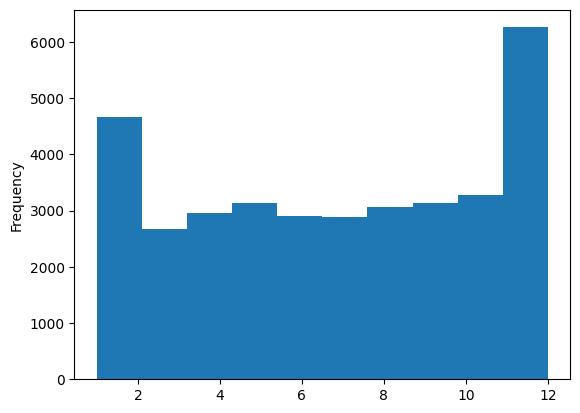

In [27]:
base_de_datos.Mes.plot(kind='hist')

In [28]:
base_de_datos['HoraOcurrenciaCorregida'] = pd.to_datetime(base_de_datos.HoraOcurrencia)

/var/folders/t9/n67k3lts6wl76ntfbg_ntw3w0000gn/T/ipykernel_22467/627809883.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  base_de_datos['HoraOcurrenciaCorregida'] = pd.to_datetime(base_de_datos.HoraOcurrencia)


In [29]:
base_de_datos['HoraOcurrenciaCorregida']

0       1899-12-31 22:30:00
1       1899-12-31 15:40:00
2       1899-12-31 07:20:00
3       1899-12-31 06:10:00
4       1899-12-31 17:00:00
                ...        
34926   1899-12-31 05:10:00
34927   1899-12-31 00:50:00
34928   1899-12-31 09:00:00
34929   1899-12-31 12:00:00
34930   1899-12-31 09:40:00
Name: HoraOcurrenciaCorregida, Length: 34931, dtype: datetime64[ns]

<Axes: ylabel='Frequency'>

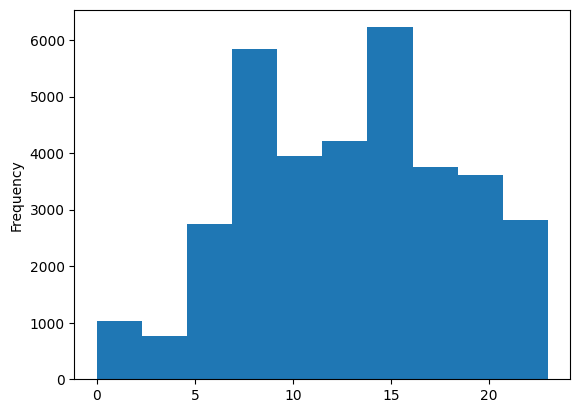

In [32]:
# Hay dos picos de accidentalidad: Al rededor de las 7-8 am y 2-3 pm
base_de_datos["HoraOcurrenciaCorregida"].dt.hour.plot(kind = "hist")

<Axes: title={'center': 'Distribución de los accidentes por hora del día'}, ylabel='Frequency'>

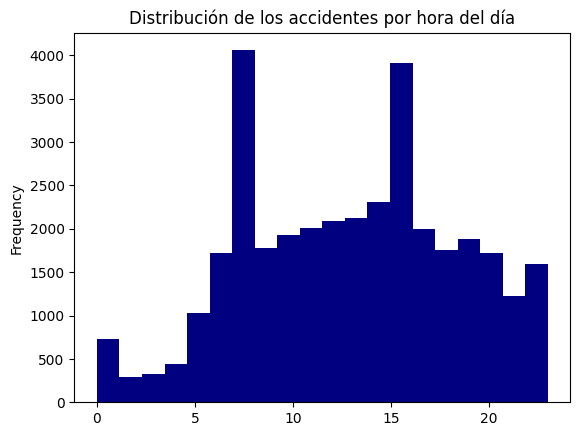

In [36]:
base_de_datos["HoraOcurrenciaCorregida"].dt.hour.plot(kind = "hist", color = "navy", 
                                          title = "Distribución de los accidentes por hora del día", bins = 20)

In [ ]:
base_de_datos.head()

<Axes: title={'center': 'Relación entre heridos y muertos'}, xlabel='Número de muertos', ylabel='Número de heridos'>

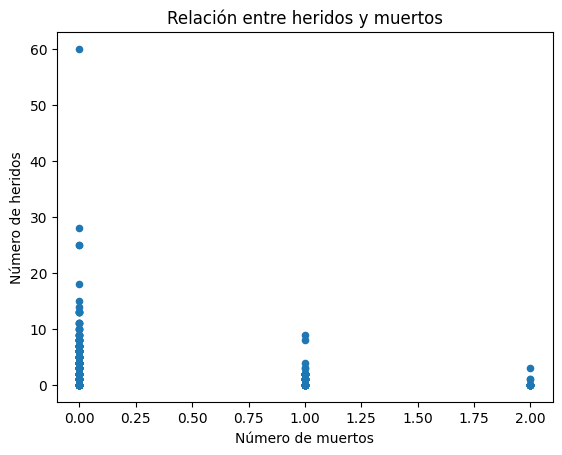

In [37]:
base_de_datos.plot(x = "TotalMuertos", y = "TotalHeridos", kind = "scatter", 
                xlabel = "Número de muertos", ylabel = "Número de heridos",
                title = "Relación entre heridos y muertos")

In [39]:
base_de_datos["GravedadNombre"].value_counts()

GravedadNombre
Solo Daños     23818
Con Heridos    10558
Con Muertos      555
Name: count, dtype: int64

In [38]:
# Creemos un gráfico de barras en donde se visualice la cantidad de accidentes por tipo
tipos_accidentes = base_de_datos["GravedadNombre"].value_counts().reset_index()
tipos_accidentes

,GravedadNombre,count
0,Solo Daños,23818
1,Con Heridos,10558
2,Con Muertos,555


In [40]:
tipos_accidentes.values

array([['Solo Daños', 23818],
       ['Con Heridos', 10558],
       ['Con Muertos', 555]], dtype=object)

<Axes: title={'center': 'Cantidad de accidentes por tipo'}, xlabel='Tipo de accidente', ylabel='Cantidad'>

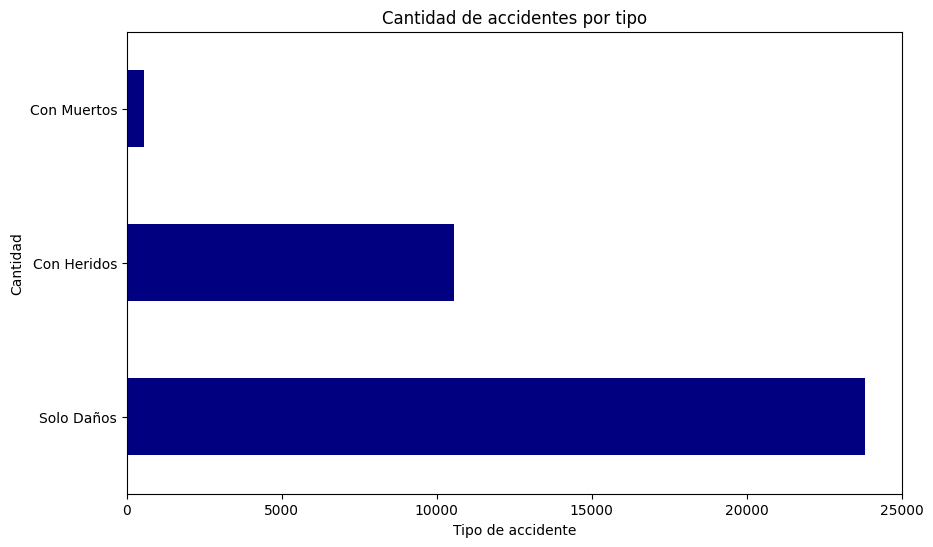

In [46]:
tipos_accidentes.plot(x = "GravedadNombre", y = "count", kind = "barh", 
                      xlabel = "Tipo de accidente", ylabel = "Cantidad", 
                      color = "navy", legend = False, 
                      title = "Cantidad de accidentes por tipo",
                      figsize = (10, 6), rot=0)

In [48]:
# ¿Cómo pasamos estos números a porcentajes?
tipos_accidentes["Proporción"] = tipos_accidentes["count"]/tipos_accidentes["count"].sum()

In [49]:
tipos_accidentes

,GravedadNombre,count,Proporción
0,Solo Daños,23818,0.681859
1,Con Heridos,10558,0.302253
2,Con Muertos,555,0.015888


<Axes: ylabel='Proporción'>

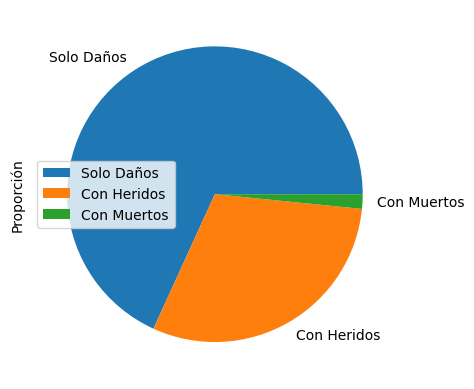

In [51]:
# Si vamos a hacer un gráfico de torta el índice debe reflejar las categoría a visualizar
tipos_accidentes.set_index("GravedadNombre").plot(y = "Proporción", kind = "pie")

También podemos importar [paletas usando el paquete seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)

<center>
<div>
<img src="img/palette.png" width="800"/>
</div>
</center>

In [ ]:
#!pip install seaborn

In [52]:
import seaborn as sns
sns.color_palette("Spectral")

[(0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197)]

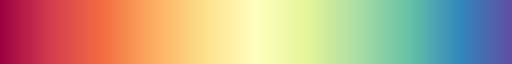

In [53]:
sns.color_palette("Spectral", as_cmap = True)

In [54]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [55]:
sns.color_palette("Blues")

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

In [56]:
sns.color_palette("viridis")

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [57]:
sns.color_palette('RdYlGn')

[(0.8899653979238754, 0.2867358708189158, 0.19815455594002307),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.8918877354863515, 0.954479046520569, 0.6010765090349867),
 (0.6165321030372937, 0.8359092656670513, 0.41191849288735105),
 (0.22468281430219145, 0.6558246828143022, 0.3444059976931949)]

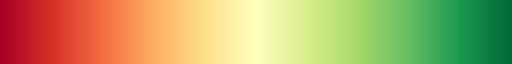

In [58]:
sns.color_palette('RdYlGn', as_cmap = True)

In [59]:
sns.color_palette('RdYlGn_r')

[(0.2246828143021916, 0.6558246828143023, 0.34440599769319497),
 (0.6165321030372936, 0.8359092656670511, 0.41191849288735105),
 (0.8918877354863515, 0.954479046520569, 0.6010765090349867),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9873125720876587, 0.647366397539408, 0.36424452133794694),
 (0.8899653979238754, 0.28673587081891583, 0.19815455594002307)]

<Axes: ylabel='Proporción'>

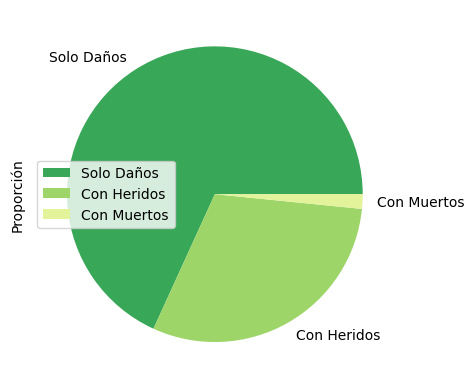

In [60]:
tipos_accidentes.set_index("GravedadNombre").plot(y = "Proporción", kind = "pie", 
                                         colors = sns.color_palette('RdYlGn_r'))

<Axes: ylabel='Proporción'>

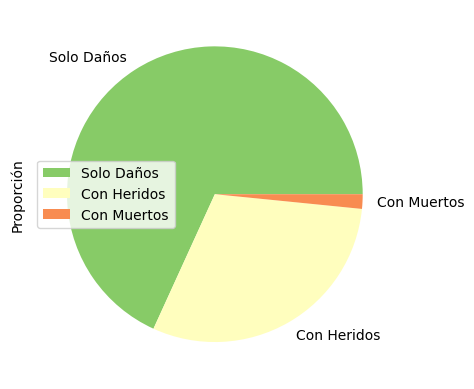

In [63]:
tipos_accidentes.set_index("GravedadNombre").plot(y = "Proporción", kind = "pie", 
                                         colors = sns.color_palette('RdYlGn_r', n_colors = len(tipos_accidentes)))

In [65]:
tipos_accidentes

,GravedadNombre,count,Proporción
0,Solo Daños,23818,0.681859
1,Con Heridos,10558,0.302253
2,Con Muertos,555,0.015888


<Axes: title={'center': 'Gravedad de los accidentes'}>

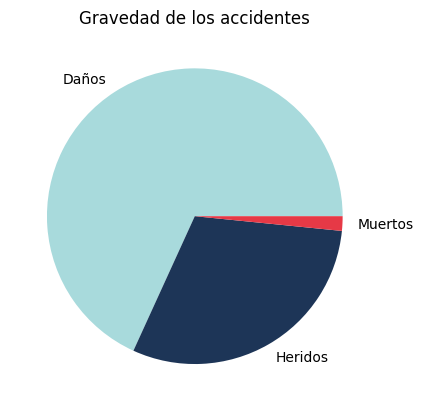

In [66]:
# También se pueden poner los labels de forma manual en vez de usar el índice
tipos_accidentes.plot(y = "Proporción", 
                      labels = ["Daños", "Heridos", "Muertos"], 
                      kind = "pie", 
                      colors = ["#a8dadc", "#1d3557", "#e63946"],
                      ylabel = "",
                      title = "Gravedad de los accidentes",
                      legend = False)

<Axes: title={'center': 'Gravedad de los accidentes'}>

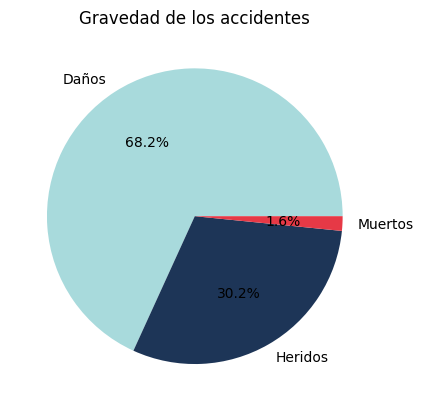

In [ ]:
# Podemos añadirle los porcentajes
tipos_accidentes.plot(y = "Proporción", 
                      labels = ["Daños", "Heridos", "Muertos"], 
                      kind = "pie", 
                      colors = ["#a8dadc", "#1d3557", "#e63946"],
                      ylabel = "",
                      title = "Gravedad de los accidentes",
                      legend = False,
                      autopct = '%.1f%%',)

<Axes: title={'center': 'Gravedad de los accidentes'}>

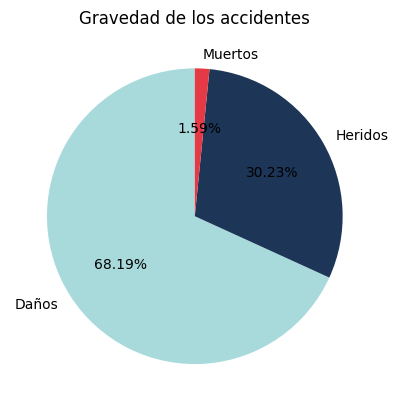

In [78]:
# Podemos mover el pie
tipos_accidentes.plot(y = "Proporción", 
                      labels = ["Daños", "Heridos", "Muertos"], 
                      kind = "pie", 
                      colors = ["#a8dadc", "#1d3557", "#e63946"],
                      ylabel = "",
                      title = "Gravedad de los accidentes",
                      legend = False,
                      autopct = '%1.2f%%',
                      startangle = 90)

<Axes: title={'center': 'Gravedad de los accidentes'}>

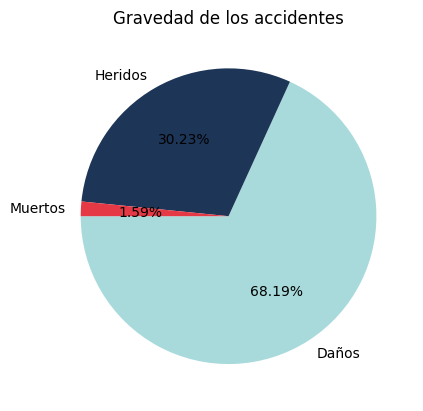

In [79]:
# Podemos mover el pie
tipos_accidentes.plot(y = "Proporción", 
                      labels = ["Daños", "Heridos", "Muertos"], 
                      kind = "pie", 
                      colors = ["#a8dadc", "#1d3557", "#e63946"],
                      ylabel = "",
                      title = "Gravedad de los accidentes",
                      legend = False,
                      autopct = '%.2f%%',
                      startangle = 180)

<Axes: title={'center': 'Gravedad de los accidentes'}>

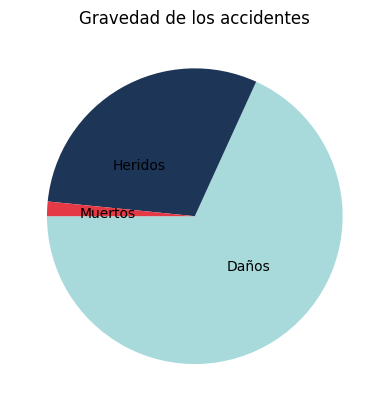

In [83]:
# Podemos mover la legenda
tipos_accidentes.plot(y = "Proporción", 
                      labels = ["Daños", "Heridos", "Muertos"], 
                      kind = "pie", 
                      colors = ["#a8dadc", "#1d3557", "#e63946"],
                      ylabel = "",
                      title = "Gravedad de los accidentes",
                      legend = False,
                      startangle = 180,
                      # Distancia de los labels al centro
                      labeldistance = 0.4)

In [ ]:
# Podemos mover los porcentajes
tipos_accidentes.plot(y = "Proporción", 
                      labels = ["Daños", "Heridos", "Muertos"], 
                      kind = "pie", 
                      colors = ["#a8dadc", "#1d3557", "#e63946"],
                      ylabel = "",
                      title = "Gravedad de los accidentes",
                      legend = False,
                      startangle = 180,
                      # Distancia de los labels al centro
                      labeldistance = 1.4,
                      # Distancia de los porcentajes al centro
                      autopct = '%1.2f%%',
                      pctdistance = 1.2
                      )

<Axes: title={'center': 'Gravedad de los accidentes'}>

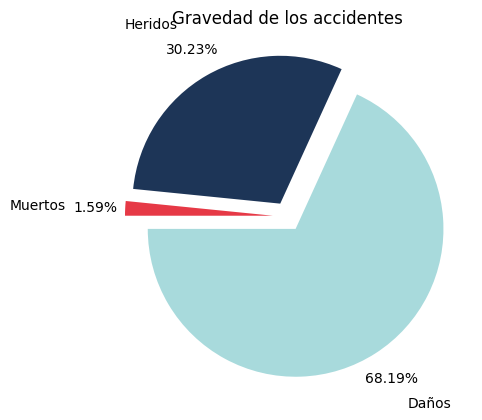

In [84]:
# Separar las porciones
tipos_accidentes.plot(y = "Proporción", 
                      labels = ["Daños", "Heridos", "Muertos"], 
                      kind = "pie", 
                      colors = ["#a8dadc", "#1d3557", "#e63946"],
                      ylabel = "",
                      title = "Gravedad de los accidentes",
                      legend = False,
                      startangle = 180,
                      # Distancia de los labels al centro
                      labeldistance = 1.4,
                      # Distancia de los porcentajes al centro
                      autopct = '%1.2f%%',
                      pctdistance = 1.2,
                      # Mover porciones
                      explode = [0.1, 0.1, 0.1]
                      )

<Axes: title={'center': '<strong>Gravedad de los accidentes \n\n<strong>'}>

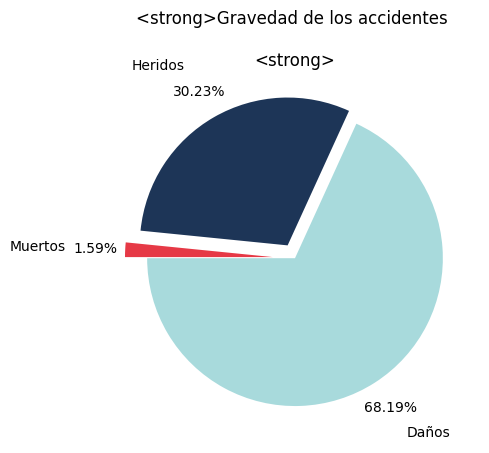

In [ ]:
# Resaltar una porción
tipos_accidentes.plot(y = "Proporción", 
                      labels = ["Daños", "Heridos", "Muertos"], 
                      kind = "pie", 
                      colors = ["#a8dadc", "#1d3557", "#e63946"],
                      ylabel = "",
                      title = "Gravedad de los accidentes \n\n",
                      legend = False,
                      startangle = 180,
                      # Distancia de los labels al centro
                      labeldistance = 1.4,
                      # Distancia de los porcentajes al centro
                      autopct = '%1.2f%%',
                      pctdistance = 1.2,
                      # Mover porciones
                      explode = [0, 0.1, 0.15]
                      )

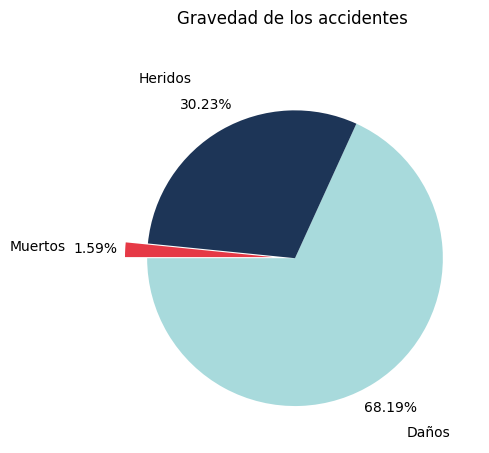

In [92]:
fig, eje = plt.subplots()
# Resaltar una porción
tipos_accidentes.plot(y = "Proporción", 
                      labels = ["Daños", "Heridos", "Muertos"], 
                      kind = "pie", 
                      colors = ["#a8dadc", "#1d3557", "#e63946"],
                      ylabel = "",
                      title = "Gravedad de los accidentes \n\n",
                      legend = False,
                      startangle = 180,
                      # Distancia de los labels al centro
                      labeldistance = 1.4,
                      # Distancia de los porcentajes al centro
                      autopct = '%1.2f%%',
                      pctdistance = 1.2,
                      # Mover porciones
                      explode = [0, 0, 0.15],
                      ax=eje)
fig.savefig('./data/figura_gravedad.png', bbox_inches='tight')

In [93]:
base_de_datos

,Fecha,GravedadNombre,ClaseNombre,ChoqueNombre,ObjetoFijoCodigo,ObjetoFijoNombre,OtraClase,NombreOtraClase,Latitud,Longitud,...,LetraVia2,CardinalVia2,Localidad,HoraOcurrencia,TipoDiseño,TipoTiempo,TotalMuertos,TotalHeridos,Mes,HoraOcurrenciaCorregida
0,2016-01-13,Con Heridos,Choque,Vehiculo,,,,,0.0,0.0,...,,,ENGATIVA,12/31/1899 10:30:00 PM,Interseccion,Normal,0,2,1,1899-12-31 22:30:00
1,2016-01-12,Con Heridos,Atropello,,,,,,0.0,0.0,...,,,USAQUEN,12/31/1899 03:40:00 PM,Interseccion,Normal,0,1,1,1899-12-31 15:40:00
2,2016-01-13,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,,E,SAN CRISTOBAL,12/31/1899 07:20:00 AM,Tramo de Via,Normal,0,0,1,1899-12-31 07:20:00
3,2016-01-17,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,,,ENGATIVA,12/31/1899 06:10:00 AM,Tramo de Via,Normal,0,0,1,1899-12-31 06:10:00
4,2016-01-18,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,,S,RAFAEL URIBE URIBE,12/31/1899 05:00:00 PM,Tramo de Via,Normal,0,0,1,1899-12-31 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34926,2016-12-30,Con Heridos,Choque,Vehiculo,,,,,0.0,0.0,...,,S,SAN CRISTOBAL,12/31/1899 05:10:00 AM,Tramo de Via,Normal,0,2,12,1899-12-31 05:10:00
34927,2016-12-30,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,,,CHAPINERO,12/31/1899 12:50:00 AM,Interseccion,Normal,0,0,12,1899-12-31 00:50:00
34928,2016-12-30,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,,,USAQUEN,12/31/1899 09:00:00 AM,Tramo de Via,Normal,0,0,12,1899-12-31 09:00:00
34929,2016-12-31,Solo Daños,Choque,Vehiculo,,,,,0.0,0.0,...,,,SUBA,12/31/1899 12:00:00 PM,Tramo de Via,Normal,0,0,12,1899-12-31 12:00:00


In [94]:
sns.color_palette('Spectral')[0]

(0.8853517877739331, 0.3190311418685121, 0.29042675893886966)

In [98]:
base_de_datos[base_de_datos.GravedadNombre=='Con Heridos'].HoraOcurrenciaCorregida.dt.hour

0        22
1        15
7        10
9        20
12        6
         ..
34915    19
34924    13
34925    17
34926     5
34930     9
Name: HoraOcurrenciaCorregida, Length: 10558, dtype: int32

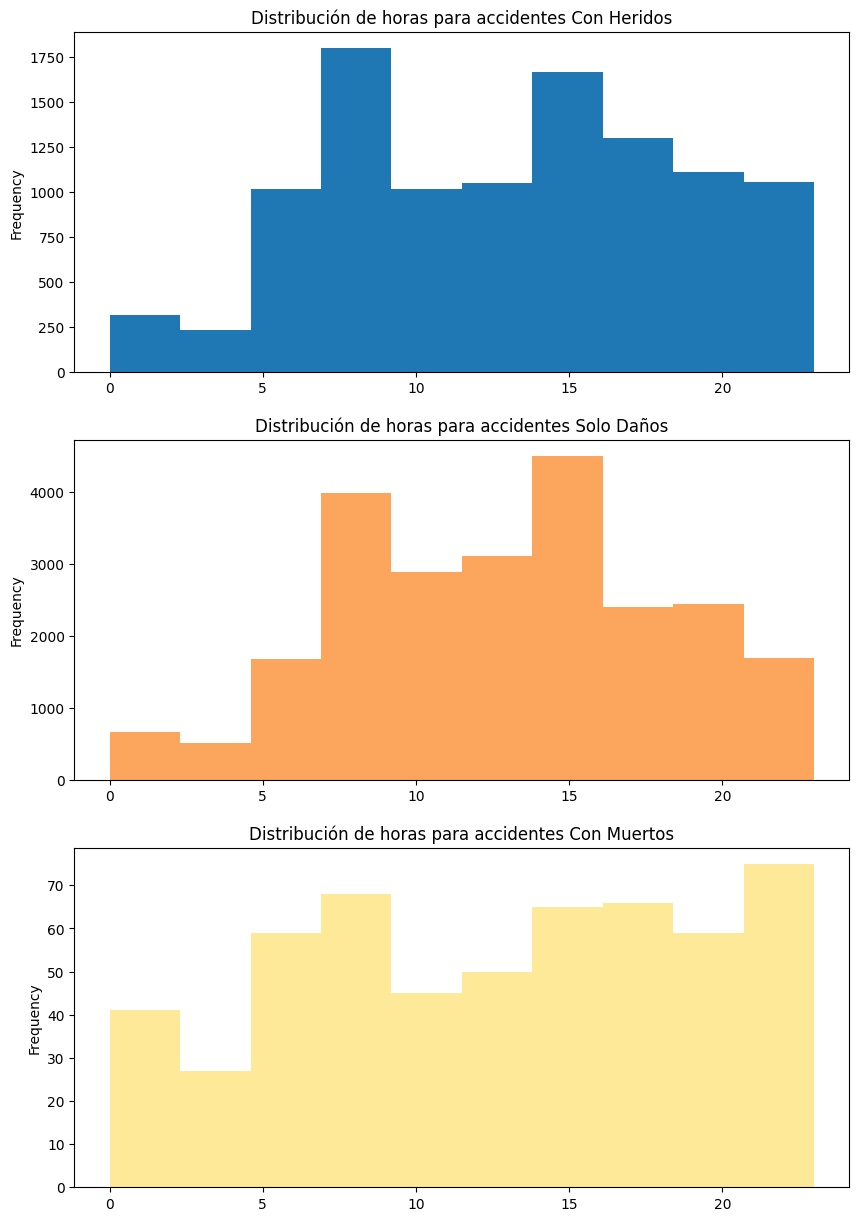

In [99]:
fig, ejes = plt.subplots(3, figsize=(10,15))

base_de_datos[base_de_datos.GravedadNombre=='Con Heridos'].HoraOcurrenciaCorregida.dt.hour.plot(kind='hist',grid=False,ax=ejes[0], style='default', title='Distribución de horas para accidentes Con Heridos')
base_de_datos[base_de_datos.GravedadNombre=='Solo Daños'].HoraOcurrenciaCorregida.dt.hour.plot(kind='hist',grid=False, color=sns.color_palette('Spectral')[1],ax=ejes[1],title='Distribución de horas para accidentes Solo Daños')
base_de_datos[base_de_datos.GravedadNombre=='Con Muertos'].HoraOcurrenciaCorregida.dt.hour.plot(kind='hist',grid=False,color=sns.color_palette('Spectral')[2],ax=ejes[2],title='Distribución de horas para accidentes Con Muertos')


fig.savefig('./data/dist_horas_categoria.pdf')

## Ejercicios adicionales

1. Gráfico de barras: Accidentes por localidad
Crea un gráfico de barras que muestre la cantidad de accidentes ocurridos en cada localidad de Bogotá durante 2016.



<Axes: xlabel='Localidad'>

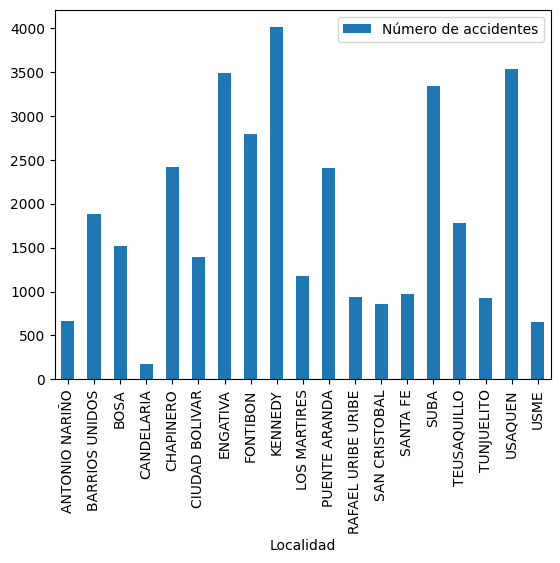

In [103]:
# 1. 
base_de_datos.groupby('Localidad').size().reset_index(name = "Número de accidentes").plot(x = "Localidad", y = "Número de accidentes", kind = "bar")

<Axes: xlabel='Localidad'>

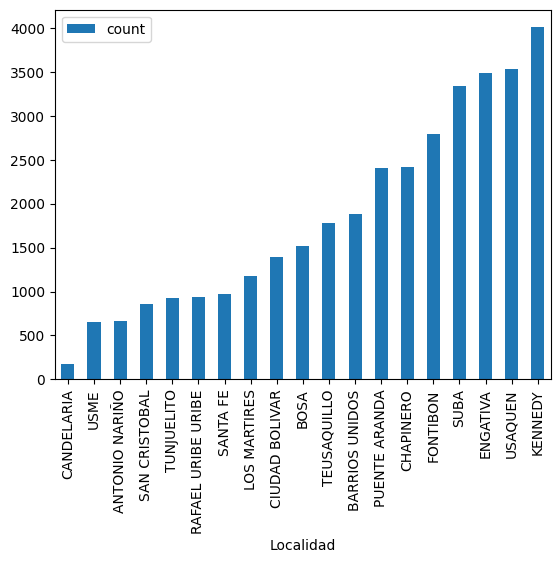

In [115]:
base_de_datos.Localidad.value_counts().reset_index().sort_values(by = 'count', ascending=True).plot(x = "Localidad", y = "count", kind = "bar")

2. Gráfico de líneas: Accidentes mensuales
Agrupa los datos por mes y grafica el número total de accidentes por cada mes del año.


<Axes: xlabel='Mes'>

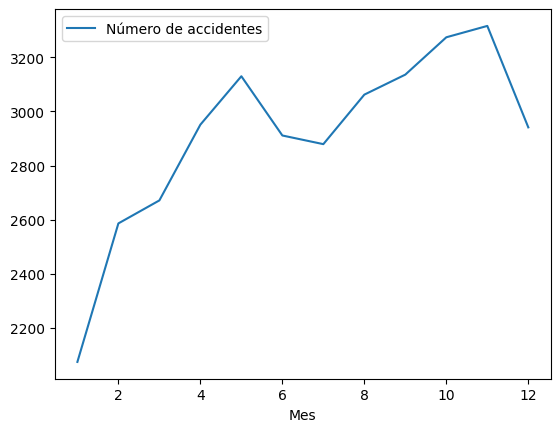

In [118]:
base_de_datos.groupby('Mes').size().reset_index(name = "Número de accidentes").plot(x = "Mes", 
                                                                                    y = "Número de accidentes", kind = "line")

In [125]:
base_de_datos['Mes_nombre'] = base_de_datos['Fecha'].dt.month_name(locale='es_ES')
base_de_datos['Mes_nombre']

0            Enero
1            Enero
2            Enero
3            Enero
4            Enero
           ...    
34926    Diciembre
34927    Diciembre
34928    Diciembre
34929    Diciembre
34930    Diciembre
Name: Mes_nombre, Length: 34931, dtype: object

<Axes: xlabel='Mes_nombre'>

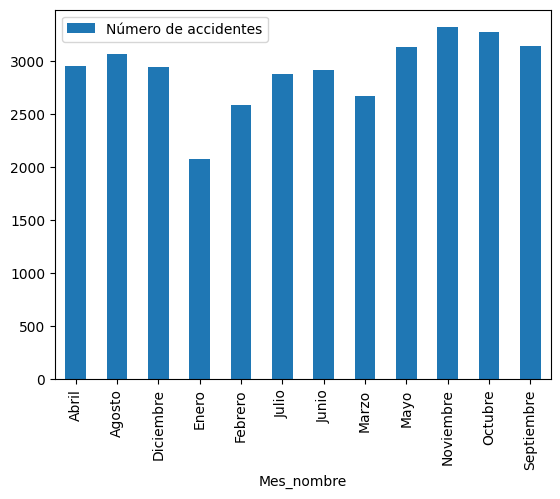

In [128]:
base_de_datos.groupby('Mes_nombre').size().reset_index(name = "Número de accidentes").plot(x = "Mes_nombre", 
                                                                                    y = "Número de accidentes", kind = "bar")

In [182]:
base_de_datos['Fecha'].dt.month_name(locale='es_ES')

0            Enero
1            Enero
2            Enero
3            Enero
4            Enero
           ...    
34926    Diciembre
34927    Diciembre
34928    Diciembre
34929    Diciembre
34930    Diciembre
Name: Fecha, Length: 34931, dtype: object

<Axes: xlabel='Fecha'>

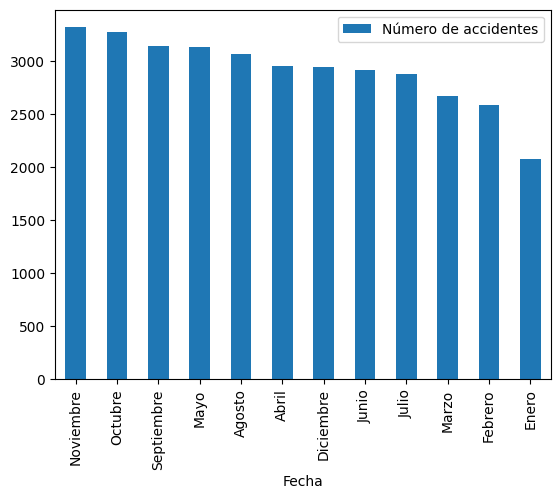

In [ ]:
base_de_datos['Fecha'].dt.month_name(locale='es_ES').value_counts().reset_index(name = "Número de accidentes").plot(x = "Fecha", 
                                                                                   y = "Número de accidentes", kind = "bar")

3. Histograma: Distribución de accidentes por día de la semana
Agrega una columna con el día de la semana y grafica un histograma con la cantidad de accidentes por cada día.



In [ ]:
base_de_datos['nombre_dia'] = base_de_datos['Fecha'].dt.day_name(locale='es_ES')#
base_de_datos.plot(kind='hist', title='Distribución de accidentes por día de la semana', color='darkblue')

4. Gráfico de torta: Proporción de accidentes por condición climática
Crea un gráfico de torta que muestre la proporción de accidentes según la condición climática reportada.

## Matplotlib y Seaborn
Matplotlib y Seaborn son dos de las bibliotecas más populares en Python para visualización de datos. Matplotlib ofrece una gran flexibilidad y control detallado sobre cada elemento gráfico, siendo ideal para gráficos personalizados y adaptaciones específicas. Por su parte, Seaborn se construye sobre Matplotlib, ofreciendo funciones simplificadas con estilos predeterminados elegantes y visualmente atractivos, lo que facilita la creación rápida de gráficos estadísticos complejos con menos líneas de código. 

En este notebook exploraremos ejemplos concretos que ilustran las fortalezas y diferencias prácticas entre ambas bibliotecas.

In [ ]:
# Datos de ejemplo
np.random.seed(56)

data = np.random.normal(size=100)
df = pd.DataFrame({
    'Categoría': np.random.choice(['A', 'B', 'C'], size=100),
    'Valor': np.random.randn(100)
})
df

,Categoría,Valor
0,B,1.377257
1,B,-0.143176
2,A,0.020316
3,C,-0.193964
4,B,0.134027
...,...,...
95,A,-1.692052
96,A,0.742686
97,C,-0.080583
98,A,0.590704


In [147]:
data

array([ 0.02964293,  2.95862545, -0.00612996, -0.15924521, -0.12144868,
       -0.58353672,  0.99013289, -0.35375433,  0.63594271,  0.28460303,
        1.21898586,  0.4201796 , -1.21338478, -1.32648779,  1.40836915,
       -0.6087108 , -1.32060258, -0.6696186 ,  1.26462529, -1.420213  ,
       -0.8664952 , -0.66680751, -1.25118987, -1.18432734, -1.51810798,
       -0.46118741, -0.35490883, -0.68253815, -1.65369784,  1.25333595,
       -1.32907883,  0.27803371, -1.07476659,  0.66831687,  0.95583236,
       -0.87761359, -1.92371573,  0.69578732,  1.87580055,  0.41569454,
        0.16054442,  0.81976061,  0.76505485, -0.82898883, -0.65915131,
        0.61112355, -0.14401335,  1.3166056 , -0.70434215,  0.75060992,
        0.34263798, -0.12643756,  1.17591077,  0.68007153, -1.00496715,
        0.64021868,  1.37499063, -0.13044469, -0.24865585, -0.66964715,
       -0.01360389,  0.68620069, -0.8176683 , -1.34635756, -0.37574991,
       -1.37972498,  0.52321844, -0.42668977, -1.75540184, -0.34

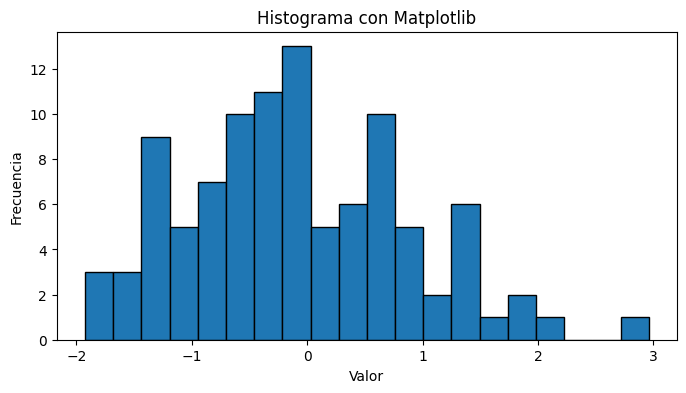

In [ ]:
# Matplotlib: Histograma
plt.figure(figsize=(8,4))
plt.hist(data, bins=20, edgecolor='black')
plt.title('Histograma con Matplotlib', fontsize=12)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show() # plt.savefig('./data/histograma_matplotlib.png', bbox_inches='tight')

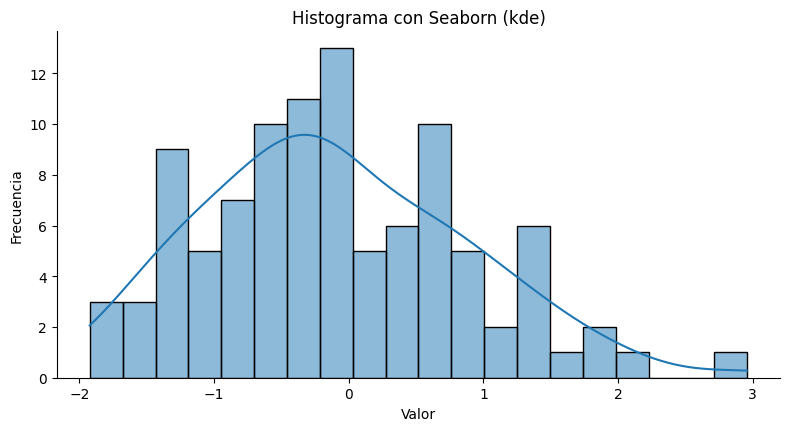

In [162]:
# Seaborn: Histograma (displot)
sns.displot(data, bins=20, kde=True, height=4, aspect=2)
plt.title('Histograma con Seaborn (kde)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


In [165]:
df

,Categoría,Valor
0,B,1.377257
1,B,-0.143176
2,A,0.020316
3,C,-0.193964
4,B,0.134027
...,...,...
95,A,-1.692052
96,A,0.742686
97,C,-0.080583
98,A,0.590704


In [ ]:
df.loc[df['Categoría']=='A']['Valor']

2     0.020316
20   -0.391620
21    0.139978
32    0.177192
33   -0.029968
34    0.199582
35   -0.126118
37   -3.231055
38   -0.269293
39   -0.110851
45    0.688297
47   -0.206662
50   -0.095203
51    0.278684
62   -1.255669
64   -0.245203
70   -1.237353
74   -0.246816
76    0.322577
78    1.032480
82    0.290874
83    0.279663
84    0.249970
86    0.435876
88    0.630488
93    0.835059
95   -1.692052
96    0.742686
98    0.590704
Name: Valor, dtype: float64

/var/folders/t9/n67k3lts6wl76ntfbg_ntw3w0000gn/T/ipykernel_22467/1951370697.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Categoría']==cat]['Valor'] for cat in ['A','B','C']], labels=['A','B','C'])


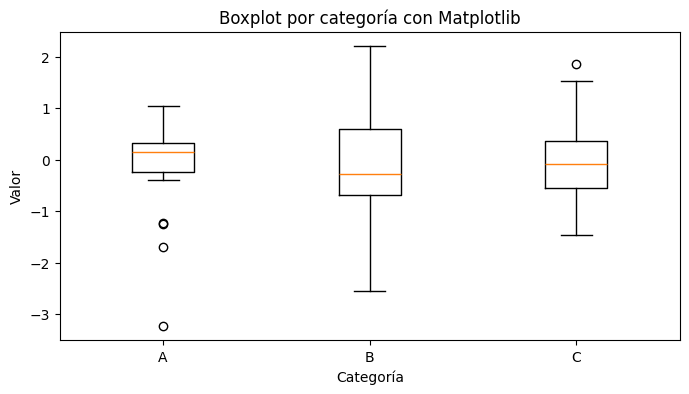

In [163]:
# Matplotlib: Boxplot
plt.figure(figsize=(8,4))
plt.boxplot([df[df['Categoría']==cat]['Valor'] for cat in ['A','B','C']], labels=['A','B','C'])
plt.title('Boxplot por categoría con Matplotlib')
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.show()

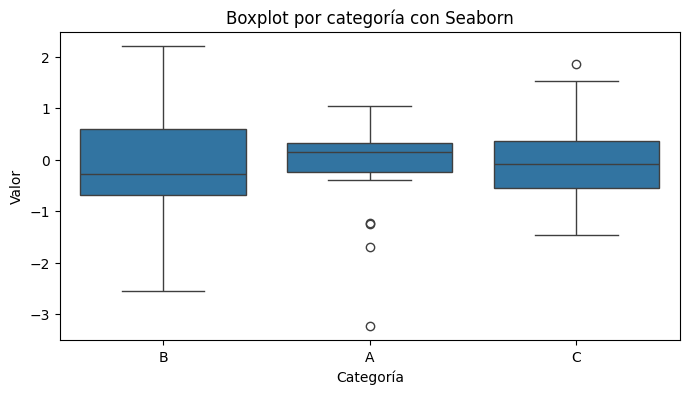

In [167]:
# Seaborn: Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='Categoría', y='Valor', data=df)
plt.title('Boxplot por categoría con Seaborn')
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.show()


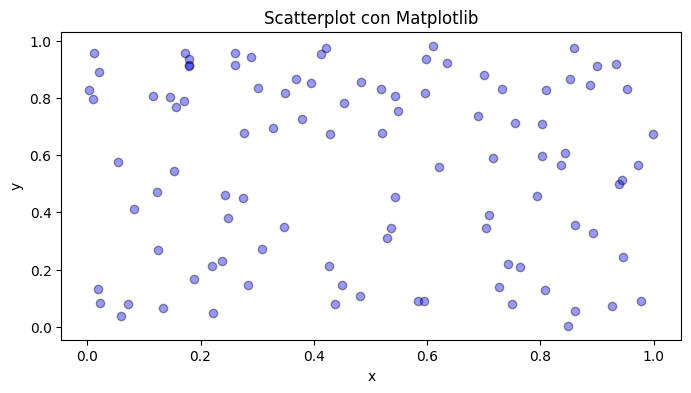

In [174]:
# Matplotlib: Scatterplot
x = np.random.rand(100)
y = np.random.rand(100)
plt.figure(figsize=(8,4))
plt.scatter(x, y, c='blue', alpha=0.4, edgecolors='black')
plt.title('Scatterplot con Matplotlib')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

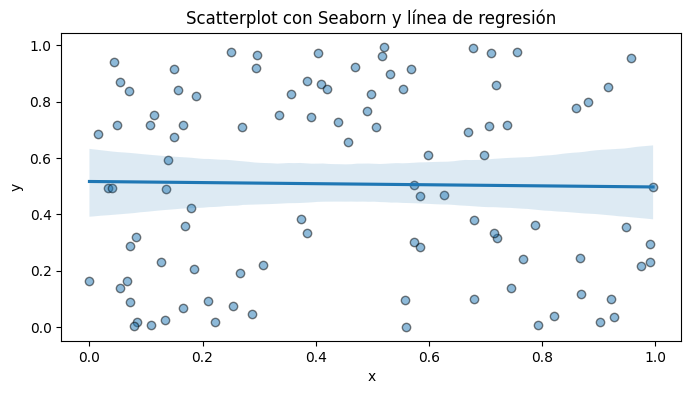

In [173]:
# Seaborn: Scatterplot con regresión
plt.figure(figsize=(8,4))
sns.regplot(x=x, y=y, scatter_kws={'alpha':0.5, 'edgecolor':'black'})
plt.title('Scatterplot con Seaborn y línea de regresión')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Cuando Seaborn se vuelve más eficiente

In [175]:
# Crear datos de ejemplo
np.random.seed(0)
df = pd.DataFrame({
    'x': np.random.rand(100),
    'y': np.random.rand(100),
    'categoría': np.random.choice(['A', 'B', 'C'], 100)
})

In [177]:
df

,x,y,categoría
0,0.548814,0.677817,C
1,0.715189,0.270008,C
2,0.602763,0.735194,A
3,0.544883,0.962189,B
4,0.423655,0.248753,B
...,...,...,...
95,0.183191,0.490459,B
96,0.586513,0.227415,A
97,0.020108,0.254356,A
98,0.828940,0.058029,A


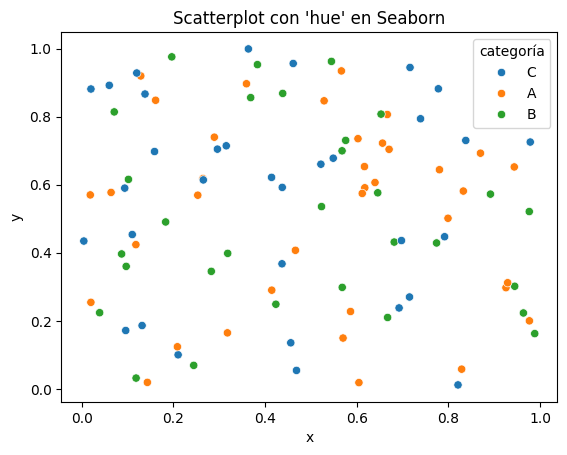

In [176]:
# Scatterplot usando 'hue'
sns.scatterplot(data=df, x='x', y='y', hue='categoría')
plt.title("Scatterplot con 'hue' en Seaborn")
plt.show()


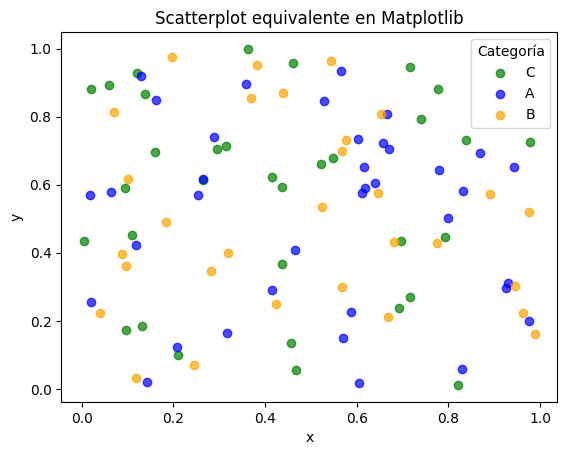

In [178]:
# Scatterplot en Matplotlib usando colores específicos
categorias = df['categoría'].unique()
colores = {'A':'blue', 'B':'orange', 'C':'green'}

for cat in categorias:
    subset = df[df['categoría'] == cat]
    plt.scatter(subset['x'], subset['y'], 
                c=colores[cat], label=cat, alpha=0.7)

plt.xlabel('x')
plt.ylabel('y')
plt.title("Scatterplot equivalente en Matplotlib")
plt.legend(title='Categoría')
plt.show()

Para ubicar la leyenda fuera del gráfico, en este [foro](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot) encuentras una explicación detallada.

## Introducción a Plotly

**Plotly** es una biblioteca de visualización interactiva para Python que permite crear gráficos dinámicos e interactivos de manera sencilla y elegante. A diferencia de bibliotecas como Matplotlib o Seaborn, que generan gráficos estáticos por defecto, Plotly permite al usuario interactuar directamente con los gráficos: hacer zoom, seleccionar áreas, mostrar u ocultar información, y más.

Entre las principales ventajas de **Plotly** se encuentra:

* **Interactividad inmediata:** los gráficos generados son interactivos por defecto, ideales para explorar datos complejos.
* **Facilidad de uso:** ofrece una sintaxis simple, intuitiva y cercana al análisis exploratorio.
* **Integración web:** facilita la creación y publicación de visualizaciones en entornos web, dashboards o reportes interactivos (por ejemplo, mediante Dash).
* **Amplia variedad de gráficos:** incluye gráficos básicos como scatterplots, histogramas y boxplots, hasta visualizaciones avanzadas como mapas interactivos, gráficos 3D y animaciones.

En esta sección exploraremos algunos ejemplos prácticos para descubrir la potencia y facilidad de uso que ofrece Plotly en la visualización moderna de datos.


In [ ]:
#!pip3 install plotly

In [ ]:
#!pip3 install --upgrade nbformat


In [1]:
import plotly.express as px

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Datos de ejemplo
np.random.seed(42)
df = pd.DataFrame({
    'x': np.random.randn(100),
    'y': np.random.randn(100),
    'categoría': np.random.choice(['Grupo A', 'Grupo B', 'Grupo C'], size=100)
})


In [4]:
df

,x,y,categoría
0,0.496714,-1.415371,Grupo B
1,-0.138264,-0.420645,Grupo B
2,0.647689,-0.342715,Grupo A
3,1.523030,-0.802277,Grupo A
4,-0.234153,-0.161286,Grupo A
...,...,...,...
95,-1.463515,0.385317,Grupo C
96,0.296120,-0.883857,Grupo C
97,0.261055,0.153725,Grupo B
98,0.005113,0.058209,Grupo C


In [7]:
fig = px.scatter(df, x='x', y='y', color='categoría',
                 title="Scatter plot interactivo con Plotly")
fig.show()

In [8]:
fig = px.histogram(df, x='x', nbins=20, color='categoría',
                   title="Histograma interactivo con Plotly")
fig.show()

In [9]:
fig = px.box(df, x='categoría', y='y', color='categoría',
             title="Boxplot interactivo con Plotly")
fig.show()

In [11]:
# Datos para gráfico de líneas
tiempo = pd.date_range('2023-01-01', periods=100)
valores = np.random.randn(100).cumsum()

# Gráfico interactivo de líneas
fig = px.line(x=tiempo, y=valores, title="Gráfico de líneas interactivo con Plotly",
              labels={'x':'Fecha', 'y':'Valor acumulado'})
fig.show()

In [12]:
## Guardar el gráfico como HTML
fig.write_html('grafico_plotly.html')

### Ejercicios de práctica con Matplotlib, Seaborn y Plotly usando el dataset Iris

### Ejercicio 1:
Realiza un histograma usando **Matplotlib** que muestre la distribución de la longitud del sépalo (`sepal_length`) del dataset Iris.

### Ejercicio 2:
Usa **Seaborn** para crear un boxplot que compare la longitud del pétalo (`petal_length`) según cada especie de flor en el dataset.

### Ejercicio 3:
Crea un gráfico de dispersión interactivo con **Plotly** que relacione el ancho del sépalo (`sepal_width`) con la longitud del sépalo (`sepal_length`). Usa diferentes colores para cada especie.

### Ejercicio 4:
Genera un `pairplot` usando **Seaborn** para visualizar la relación entre todas las variables del dataset Iris, separando los resultados por especie.

### Ejercicio 5:
Usando **Plotly**, realiza un gráfico interactivo de barras que muestre el ancho promedio del pétalo (`petal_width`) por cada especie del dataset Iris.


In [ ]:
import seaborn as sns

# Cargar datos
iris = sns.load_dataset('iris')

In [ ]:
iris.head()